### IMPORT LIBRARY

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Visual settings
%matplotlib inline
sns.set(style="whitegrid")

### IMPORT RAW DATA

In [3]:
csv_path = "../data/raw/bangkok_traffy.csv"
df = pd.read_csv(csv_path, parse_dates=["timestamp", "last_activity"], low_memory=False)
print("Loaded df shape:", df.shape)
df.head(5)

Loaded df shape: (787026, 16)


,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
0,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53084,13.81865",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,NaN,0,2022-06-04 15:34:14.609206+00
1,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.66709,13.67891",189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...,หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00,เสร็จสิ้น,4.0,0,2022-06-21 08:21:09.532782+00
2,2021-7XATFA,{สะพาน},เขตสาทร,สะพานลอยปรับปรุงไม่เสร็จตามกำหนด\nปากซอย สาทร12,https://storage.googleapis.com/traffy_public_b...,NaN,"100.52649,13.72060",191/1 ถนน สาทรเหนือ แขวง สีลม เขตบางรัก กรุงเท...,ยานนาวา,สาทร,กรุงเทพมหานคร,2021-09-26 05:03:52.594898+00,เสร็จสิ้น,NaN,0,2022-06-06 01:17:12.272904+00
3,2021-9U2NJT,{น้ำท่วม},"เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ",น้ำท่วม,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.53099,13.81853",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-10-14 10:45:27.713884+00,เสร็จสิ้น,NaN,0,2022-09-08 08:35:43.784519+00
4,2021-DVEWYM,"{น้ำท่วม,ถนน}","เขตลาดพร้าว,ฝ่ายโยธา เขตลาดพร้าว",ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.59165,13.82280",702 ถ. ลาดพร้าววังหิน แขวงลาดพร้าว เขตลาดพร้าว...,ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2021-12-09 12:29:08.408763+00,เสร็จสิ้น,5.0,0,2022-08-12 07:18:44.884945+00


In [4]:
df['type'] = df['type'].astype(str).str.replace(r'[{}]', '', regex=True)
df.sample(5)

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
16654,2022-EV7ZWX,ทางเท้า,"เขตภาษีเจริญ,ผอ.เขตภาษีเจริญ (นางเยาวะสกุล),กล...",ทางเท้าฝั่งตรงข้าม seacon บางแค ตอนแรกมีเสากั้...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.43367,13.71291",340 ถ. เพชรเกษม แขวง บางหว้า เขตภาษีเจริญ กรุง...,บางหว้า,ภาษีเจริญ,กรุงเทพมหานคร,2022-06-09 12:03:28.872726+00,เสร็จสิ้น,3.0,2,2022-08-31 05:12:13.095233+00
482605,NaN,ทางเท้า,"เขตจตุจักร,สำนักการระบายน้ำ กทม.,ฝ่ายโยธา เขตจ...",NaN,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.56967,13.79935",NaN,ดินแดง,ดินแดง,กรุงเทพมหานคร,2024-01-21 10:21:23.96897+00,เสร็จสิ้น,5.0,0,2024-08-12 04:52:37.898146+00
636431,68BCY8,"เสนอแนะ,ถนน","เขตพระนคร,สำนักการศึกษา สนศ.กทม.",ปัญหา: เสนอแนะ อยากให้นักเรียนในสังกัดกรุงเทพม...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.50183,13.75404",208 ถ. วิทยุ แขวงเสาชิงช้า เขตพระนคร กรุงเทพมห...,เสาชิงช้า,พระนคร,จังหวัดกรุงเทพมหานคร,2024-07-25 12:52:32.470157+00,เสร็จสิ้น,NaN,0,2024-08-09 10:48:30.056773+00
768456,2024-9TNY6Y,"ป้าย,แสงสว่าง,ร้องเรียน","บริษัท สเตฟานี่ จำกัด,เขตบางซื่อ,สำนักการจราจร...",แจ้งปัญหาป้ายรถเมลล์ไฟดับ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53420,13.83070",เบนซ์ วงศ์สว่าง แขวง วงศ์สว่าง เขตบางซื่อ กรุง...,วงศ์สว่าง,บางซื่อ,กรุงเทพมหานคร,2024-12-23 11:17:24.944543+00,กำลังดำเนินการ,NaN,0,2025-01-15 07:25:59.241005+00
351073,ZNZ4PV,"ถนน,ร้องเรียน","ส่วนสวนสาธารณะ 2 สสณ. สสล.,เขตปทุมวัน,สำนักสิ่...",ปัญหา: ประชาชนแจ้งร้องเรียน เจ้าหน้าที่ หัวหน้...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.54168,13.73158",PGJR+FJ5 แขวงลุมพินี เขตปทุมวัน กรุงเทพมหานคร ...,ลุมพินี,ปทุมวัน,จังหวัดกรุงเทพมหานคร,2023-08-17 09:48:43.337796+00,เสร็จสิ้น,NaN,0,2024-05-15 13:19:52.664918+00


### Visualizing Data to decide what should we clean

In [5]:
# Force Matplotlib / Seaborn to use a Thai-capable font if available
# On Windows: 'Tahoma' or 'Segoe UI' usually has Thai glyphs; 'TH Sarabun New' or 'Noto Sans Thai' are good options.

import matplotlib.font_manager as fm

# Useful debug info — print a few district samples to see if characters are loaded correctly
print('Sample district values (first 10):\n', df['district'].astype(str).head(10).tolist())

# list candidate fonts that may contain Thai (on Windows often 'Tahoma' or 'Segoe UI')
candidates = ['TH Sarabun New', 'Noto Sans Thai', 'Tahoma', 'Segoe UI', 'Tahoma', 'Arial Unicode MS']
available = {f.name for f in fm.fontManager.ttflist}
found = [c for c in candidates if c in available]
print('Available Thai-capable fonts found on this system:', found)

# If at least one candidate is available, set it as default; otherwise fallback to DejaVu but warn
if found:
    font_choice = found[0]
    print('Setting default matplotlib font to:', font_choice)
    import matplotlib as mpl
    mpl.rc('font', family=font_choice)
    mpl.rcParams['axes.unicode_minus'] = False
else:
    print('No recommended Thai fonts found in Matplotlib manager — consider installing Noto Sans Thai or TH Sarabun New')

# After setting font re-draw — this ensures later plots use the selected font
plt.rcParams.update({'font.size': 12})

# Optional: rebuild font cache if testing shows new fonts not picked up
# fm._rebuild()  # uncomment if you installed a new font during the session


Sample district values (first 10):
 ['nan', 'ประเวศ', 'สาทร', 'nan', 'ลาดพร้าว', 'ลาดพร้าว', 'ดุสิต', 'ประเวศ', 'ประเวศ', 'ประเวศ']
Available Thai-capable fonts found on this system: ['Tahoma', 'Segoe UI', 'Tahoma']
Setting default matplotlib font to: Tahoma


Columns and dtypes:
 ticket_id         object
type              object
organization      object
comment           object
photo             object
photo_after       object
coords            object
address           object
subdistrict       object
district          object
province          object
timestamp         object
state             object
star             float64
count_reopen       int64
last_activity     object
dtype: object

Null counts (top columns):
 star             512929
photo_after      145717
address            8772
ticket_id          8772
comment            8772
organization        571
subdistrict         566
district            561
province            195
photo               115
coords                0
type                  0
timestamp             0
state                 0
count_reopen          0
last_activity         0
dtype: int64

Null counts (top columns):
 star             512929
photo_after      145717
address            8772
ticket_id          8772
comment       

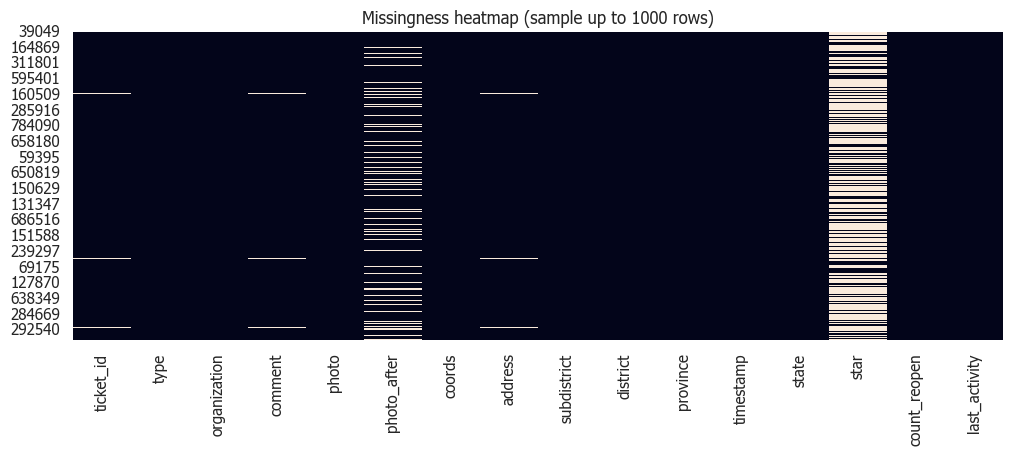

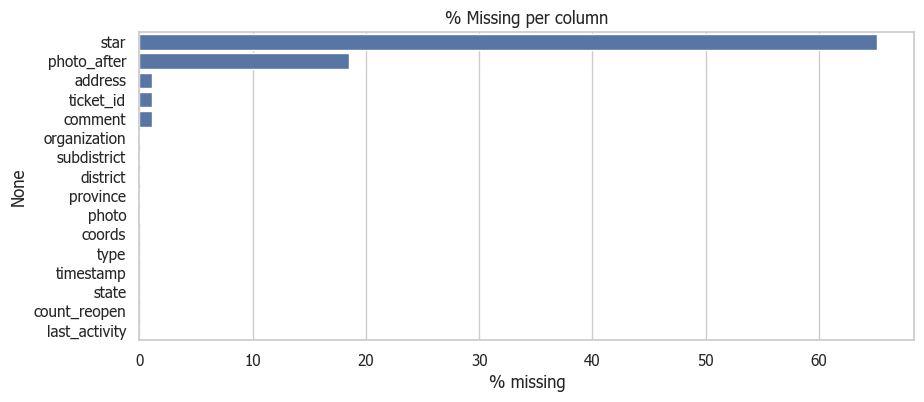


Top values for type (top 10):
type
               115110
ถนน             85651
ทางเท้า         54485
แสงสว่าง        34163
ความสะอาด       32223
กีดขวาง         28404
น้ำท่วม         17860
ท่อระบายน้ำ     17496
จราจร           17003
ป้าย            15237
Name: count, dtype: int64

Top values for district (top 10):
district
จตุจักร      42258
ประเวศ       27080
คลองเตย      25937
วัฒนา        25131
บางกะปิ      24642
ปทุมวัน      23772
บางแค        23386
บางเขน       21748
ลาดกระบัง    19980
ราชเทวี      19869
Name: count, dtype: int64

Top values for state (top 10):
state
เสร็จสิ้น         645700
กำลังดำเนินการ    129620
รอรับเรื่อง        11706
Name: count, dtype: int64


In [6]:
# Quick summary & missingness checks

print("Columns and dtypes:\n", df.dtypes)
print("\nNull counts (top columns):\n", df.isnull().sum().sort_values(ascending=False).head(20))
print("\nPercent null for all columns:\n", (df.isnull().mean()*100).round(2).sort_values(ascending=False))

# Keep some easy summary stats
print('\nBasic numeric describe:')
print(df.describe(include=[np.number]).T)

print('\nValue counts (type; top 10)')
print(df['type'].value_counts().head(10))

# Missingness heatmap for column-level overview (row sampling to avoid huge heatmap)
sample = df.sample(min(len(df), 1000), random_state=2)  # plot a sample for visibility
plt.figure(figsize=(12,4))
sns.heatmap(sample.isnull(), cbar=False)
plt.title('Missingness heatmap (sample up to 1000 rows)')
plt.show()

# Show percent missing barplot
plt.figure(figsize=(10,4))
null_perc = (df.isnull().mean()*100).sort_values(ascending=False)
sns.barplot(x=null_perc.values, y=null_perc.index)
plt.xlabel('% missing')
plt.title('% Missing per column')
plt.show()

# Add a quick top-level counts table for some categorical fields
cats = ['type','district','state']
for c in cats:
    print(f"\nTop values for {c} (top 10):")
    print(df[c].value_counts().head(10))


C:\Users\kkeaa\AppData\Local\Temp\ipykernel_13780\2772450861.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['type_clean'].value_counts().nlargest(20).index, x=df['type_clean'].value_counts().nlargest(20).values, palette='viridis')


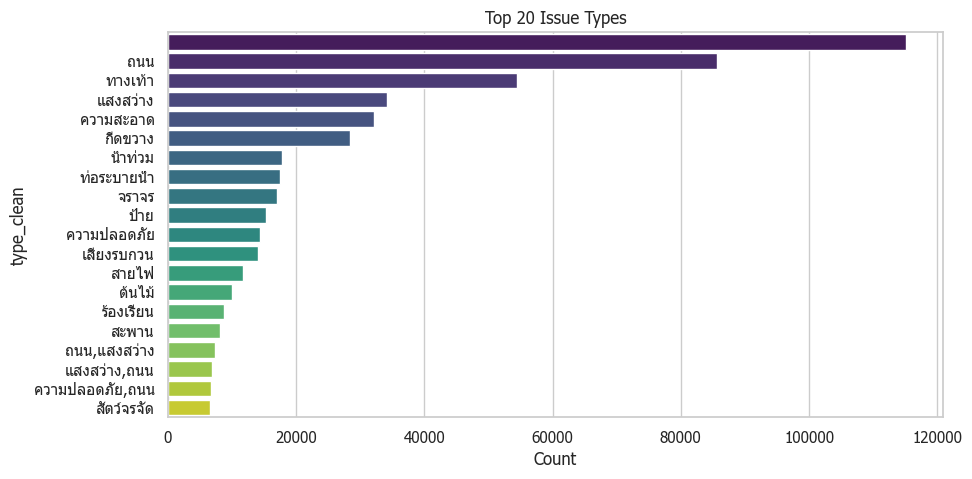

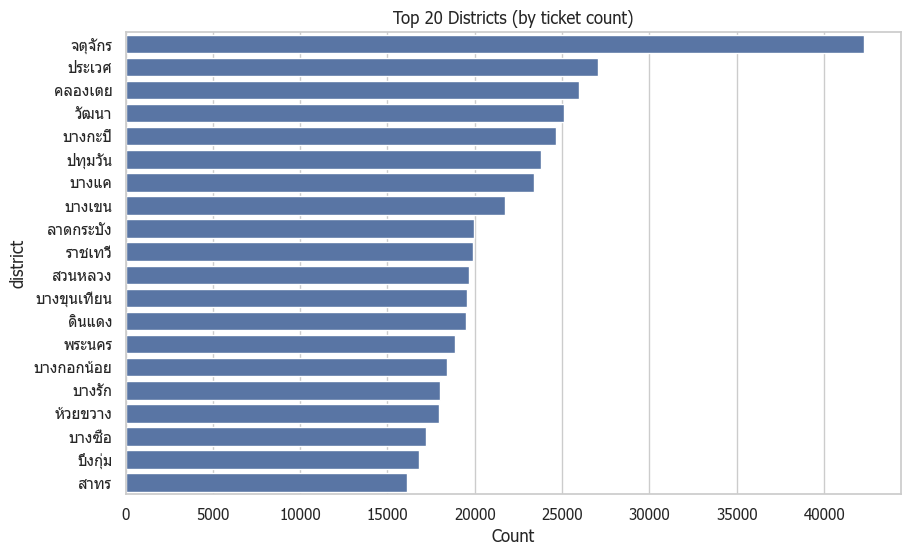

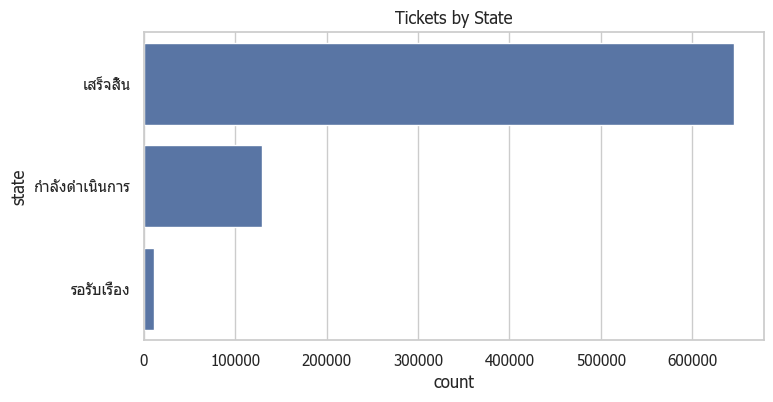

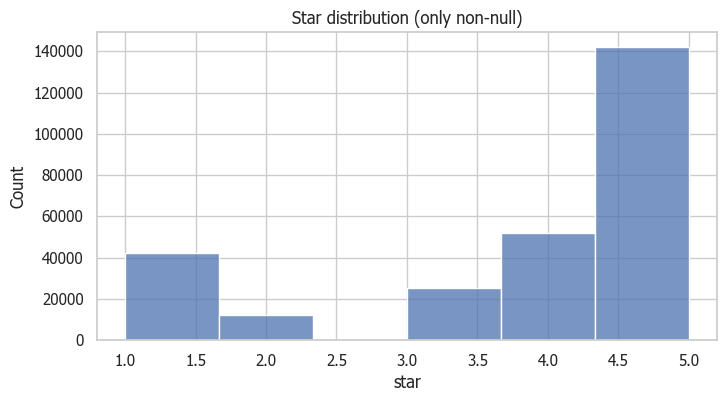

Percent star missing:  65.17306925057113

Photo presence counts:
has_photo
True     786995
False        31
Name: count, dtype: int64


C:\Users\kkeaa\AppData\Local\Temp\ipykernel_13780\2772450861.py:65: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(df_map, lat='lat', lon='lon', color='state', hover_name='ticket_id', hover_data=['type_clean','district'], zoom=10, height=600)


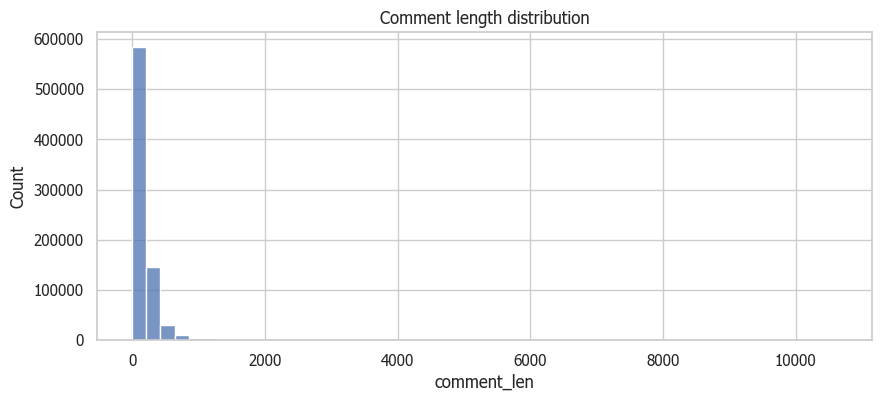

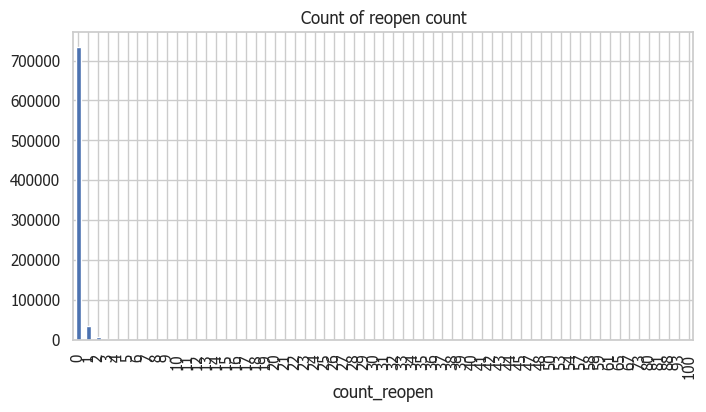

Duplicates by ticket_id: 8771


C:\Users\kkeaa\AppData\Local\Temp\ipykernel_13780\2772450861.py:101: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




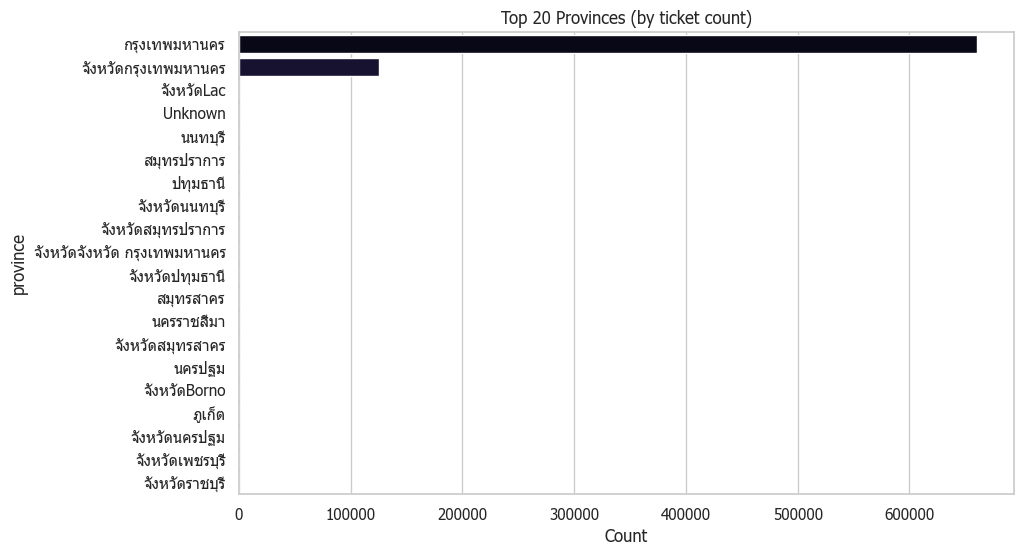

In [7]:
# Quick EDA visualizations — counts, time series, map, comment length

# Simple cleaning for ETL/EDA steps
df['type_clean'] = df['type'].astype(str).str.replace('[{}]', '', regex=True).str.strip()
df['has_photo'] = df['photo'].notnull() | df['photo_after'].notnull()
df['comment_len'] = df['comment'].fillna('').str.len()

coords = df['coords'].astype(str).str.split(',', expand=True)
if coords.shape[1] >= 2:
    df['lon'] = pd.to_numeric(coords[0].str.strip(), errors='coerce')
    df['lat'] = pd.to_numeric(coords[1].str.strip(), errors='coerce')

# Top categories
plt.figure(figsize=(10,5))
sns.barplot(y=df['type_clean'].value_counts().nlargest(20).index, x=df['type_clean'].value_counts().nlargest(20).values, palette='viridis')
plt.title('Top 20 Issue Types')
plt.xlabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(y=df['district'].value_counts().nlargest(20).index, x=df['district'].value_counts().nlargest(20).values)
plt.title('Top 20 Districts (by ticket count)')
plt.xlabel('Count')
plt.show()

plt.figure(figsize=(8,4))
ax = sns.countplot(y='state', data=df, order=df['state'].value_counts().index)
plt.title('Tickets by State')
plt.show()

# Time series (daily then monthly)
if 'timestamp' in df.columns and pd.api.types.is_datetime64_any_dtype(df['timestamp']):
    ts = df.set_index('timestamp').resample('D').size()
    ts_7 = ts.rolling(7, center=True).mean()
    plt.figure(figsize=(12,4))
    ts.plot(label='Daily', alpha=0.5)
    ts_7.plot(label='7-day rolling')
    plt.title('Tickets per Day — raw + 7-day rolling')
    plt.legend()
    plt.show()

    # Monthly
    ts_m = df.set_index('timestamp').resample('M').size()
    plt.figure(figsize=(12,4))
    ts_m.plot(marker='o')
    plt.title('Tickets per Month')
    plt.show()

# Star rating distribution
plt.figure(figsize=(8,4))
sns.histplot(df['star'].dropna(), bins=6, kde=False)
plt.title('Star distribution (only non-null)')
plt.show()
print('Percent star missing: ', df['star'].isnull().mean()*100)

# Photo presence
print('\nPhoto presence counts:')
print(df['has_photo'].value_counts())

# Map (Bangkok) — sample to keep interactive plot light
if 'lat' in df.columns and 'lon' in df.columns:
    df_map = df.dropna(subset=['lat','lon']).copy()
    if len(df_map) > 2000:
        df_map = df_map.sample(2000, random_state=42)
    fig = px.scatter_mapbox(df_map, lat='lat', lon='lon', color='state', hover_name='ticket_id', hover_data=['type_clean','district'], zoom=10, height=600)
    fig.update_layout(mapbox_style='open-street-map')
    fig.update_layout(title='Ticket Locations (sample up to 2000)')
    fig.show()
else:
    print('No valid lat/lon to plot (coords missing/invalid)')

# Comment length distribution
plt.figure(figsize=(10,4))
sns.histplot(df['comment_len'], bins=50)
plt.title('Comment length distribution')
plt.show()

# Reopen & duplicates
plt.figure(figsize=(8,4))
val = df['count_reopen'].value_counts().sort_index()
if not val.empty:
    val.plot(kind='bar')
    plt.title('Count of reopen count')
    plt.xlabel('count_reopen')
    plt.show()

print('Duplicates by ticket_id:', df.duplicated('ticket_id').sum())

# Difference between last_activity and timestamp in days
if 'last_activity' in df.columns and pd.api.types.is_datetime64_any_dtype(df['last_activity']):
    df['days_to_last'] = (df['last_activity'] - df['timestamp']).dt.days
    plt.figure(figsize=(8,4))
    sns.histplot(df['days_to_last'].dropna(), bins=50)
    plt.title('Days from creation (timestamp) to last activity')
    plt.show()

# Province distribution (bar + donut). รองรับค่า NA เป็น 'Unknown'
plt.figure(figsize=(10,6))
prov_counts = df["province"].fillna("Unknown").value_counts()
top_prov = prov_counts.nlargest(20)
sns.barplot(y=top_prov.index, x=top_prov.values, palette="magma")
plt.title("Top 20 Provinces (by ticket count)")
plt.xlabel("Count")
plt.show()


### Cleansing Data

In [8]:
df.drop(columns=['star'], inplace=True) # drop start columns with 65% NaN rate

In [9]:
df['province'] = df['province'].astype(str).str.strip()  # remove leading/trailing spaces
# Map any string containing 'กรุงเทพ' to the canonical 'กรุงเทพมหานคร'
df.loc[df['province'].str.contains('กรุงเทพ', na=False), 'province'] = 'กรุงเทพมหานคร'

# Optionally show result counts
print("Province unique after unify:", df['province'].value_counts().head(10))

# Create filtered DF (keeps original df if you want to preserve)
df_bkk = df[df['province'] == 'กรุงเทพมหานคร'].copy()
print("Rows total:", len(df), "Rows Bangkok only:", len(df_bkk))
df = df_bkk

Province unique after unify: province
กรุงเทพมหานคร         785656
จังหวัดLac               293
nan                      195
นนทบุรี                  194
สมุทรปราการ              191
ปทุมธานี                  81
จังหวัดนนทบุรี            67
จังหวัดสมุทรปราการ        53
จังหวัดปทุมธานี           29
สมุทรสาคร                 26
Name: count, dtype: int64
Rows total: 787026 Rows Bangkok only: 785656
Rows total: 787026 Rows Bangkok only: 785656


In [10]:
print("subdistrict null count",df['subdistrict'].isna().sum())
print("district null count",df['district'].isna().sum())

subdistrict null count 48
district null count 43


In [11]:
df.dropna(subset=['subdistrict','district'], how='any', inplace=True)

In [12]:
df["district"].value_counts().sort_values()

district
บางพลี                   1
เมืองสมุทรสาคร           1
เมืองปทุมธานี            1
สามพราน                  1
เมืองนนทบุรี             2
พระประแดง                2
ลำลูกกา                  2
บางกรวย                  3
สัมพันธวงศ์           4880
บางกอกใหญ่            6481
ราษฎร์บูรณะ           6960
ทวีวัฒนา              7946
ทุ่งครุ               8460
คลองสาน               8482
คันนายาว              8686
บางบอน                8865
ดุสิต                 9566
ดอนเมือง             11092
หนองแขม              11188
สะพานสูง             11348
บางคอแหลม            11396
จอมทอง               11609
พระโขนง              12114
ป้อมปราบศัตรูพ่าย    12363
ยานนาวา              12808
ตลิ่งชัน             12939
สายไหม               13349
ภาษีเจริญ            13386
หลักสี่              13398
มีนบุรี              13427
บางพลัด              13657
หนองจอก              14341
วังทองหลาง           14648
บางนา                14994
พญาไท                15036
ลาดพร้าว             15076
คลองสามวา          

Districts with >100 tickets: 50
district
จตุจักร              42255
ประเวศ               27075
คลองเตย              25935
วัฒนา                25131
บางกะปิ              24642
ปทุมวัน              23772
บางแค                23384
บางเขน               21747
ลาดกระบัง            19979
ราชเทวี              19869
สวนหลวง              19665
บางขุนเทียน          19526
ดินแดง               19484
พระนคร               18868
บางกอกน้อย           18426
บางรัก               18000
ห้วยขวาง             17942
บางซื่อ              17193
บึงกุ่ม              16811
สาทร                 16145
ธนบุรี               15730
คลองสามวา            15519
ลาดพร้าว             15076
พญาไท                15036
บางนา                14994
วังทองหลาง           14648
หนองจอก              14341
บางพลัด              13657
มีนบุรี              13427
หลักสี่              13398
ภาษีเจริญ            13386
สายไหม               13349
ตลิ่งชัน             12939
ยานนาวา              12808
ป้อมปราบศัตรูพ่าย    12363
พระโขนง       

C:\Users\kkeaa\AppData\Local\Temp\ipykernel_13780\2897829470.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




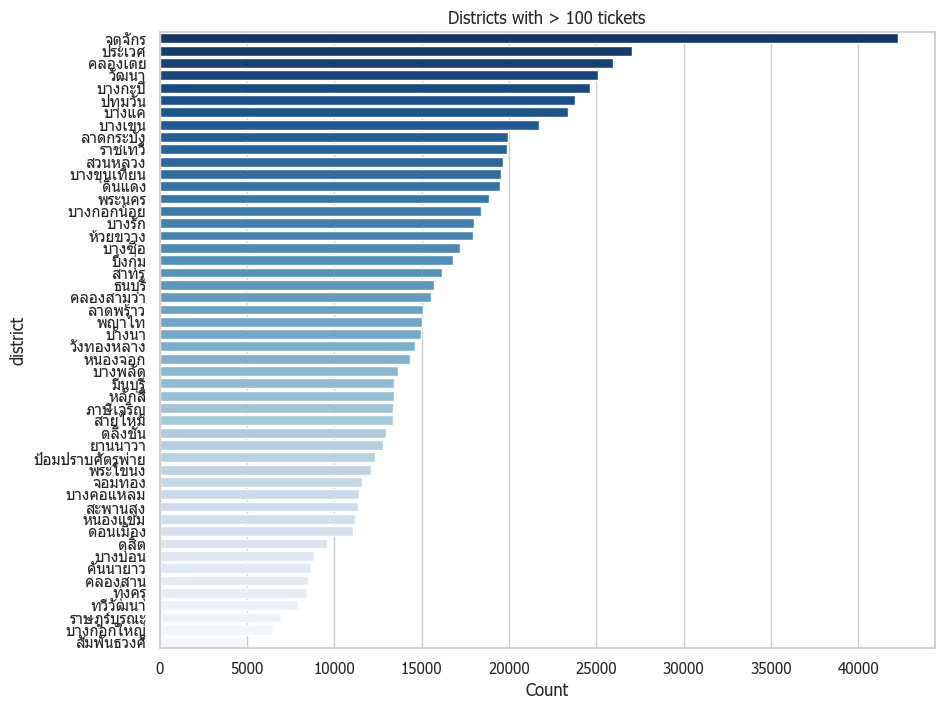

In [13]:
# กรองเฉพาะ district ที่มี ticket มากกว่า 100
district_counts = df['district'].dropna().value_counts()
district_gt100 = district_counts[district_counts > 100]
print("Districts with >100 tickets:", len(district_gt100))
print(district_gt100)

# สร้าง DataFrame ที่เก็บเฉพาะ rows ของ districts เหล่านั้น (ไม่ทับ df ถ้าต้องเก็บต้นฉบับ)
df_districts_filtered = df[df['district'].isin(district_gt100.index)].copy()
print("Filtered df shape:", df_districts_filtered.shape)

# Plot ใหม่ (top districts after filtering)
plt.figure(figsize=(10,8))
sns.barplot(y=district_gt100.index, x=district_gt100.values, palette='Blues_r')
plt.title('Districts with > 100 tickets')
plt.xlabel('Count')
plt.show()

In [14]:
df.dropna(inplace=True)

In [15]:
df.to_csv("../data/interim/bangkok_traffy_cleaned.csv", index=False)

In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')

# 2. หาวันที่แรกสุด (min) และวันที่ล่าสุด (max) ในคอลัมน์ 'timestamp'
first_day = df['timestamp'].min()
last_day = df['timestamp'].max()

# 3. แสดงผลลัพธ์
print(f"วันแรกของข้อมูลคือ: {first_day}")
print(f"วันสุดท้ายของข้อมูลคือ: {last_day}")

# หากต้องการดูเฉพาะวันที่ ไม่รวมเวลา สามารถใช้ .dt.date
print(f"วันแรกของข้อมูล (เฉพาะวันที่): {first_day.date()}")
print(f"วันสุดท้ายของข้อมูล (เฉพาะวันที่): {last_day.date()}")

วันแรกของข้อมูลคือ: 2021-09-19 14:56:08.924992+00:00
วันสุดท้ายของข้อมูลคือ: 2025-01-16 01:28:46.052220+00:00
วันแรกของข้อมูล (เฉพาะวันที่): 2021-09-19
วันสุดท้ายของข้อมูล (เฉพาะวันที่): 2025-01-16
